# LAB 2 : Data Preprocessing and cleaning Part 2 

<font color="red"> **<strong>In this lab, your task is to carefully review all instructions and fill the empty codd cells with the necessary code to ensure everything functions correctly.</strong>**</font>

The majority of data science work often revolves around pre-processing data, and making sure it's ready for analysis. In this session, we will be covering how transform our raw data into accurate insights. In this notebook, you will learn:

* Import data into `pandas`, and use simple functions to diagnose problems in our data.
* Visualize missing and out of range data using `missingno` and `seaborn`.
* Apply a range of data cleaning tasks that will ensure the delivery of accurate insights.

## **The Dataset**

The dataset to be used in this webinar is a CSV file named `airbnb.csv`, which contains data on airbnb listings in the state of New York. It contains the following columns:

- `listing_id`: The unique identifier for a listing
- `description`: The description used on the listing
- `host_id`: Unique identifier for a host
- `host_name`: Name of host
- `neighbourhood_full`: Name of boroughs and neighbourhoods
- `coordinates`: Coordinates of listing _(latitude, longitude)_
- `Listing added`: Date of added listing
- `room_type`: Type of room 
- `rating`: Rating from 0 to 5.
- `price`: Price per night for listing
- `number_of_reviews`: Amount of reviews received 
- `last_review`: Date of last review
- `reviews_per_month`: Number of reviews per month
- `availability_365`: Number of days available per year
- `Number of stays`: Total number of stays thus far


## **Getting started**

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import datetime as dt

In [2]:
# Read in the dataset
airbnb = pd.read_csv('https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true', index_col = 'Unnamed: 0')

## **Diagnosing data cleaning problems using simple `pandas` and visualizations** 

Some important and common methods needed to get a better understanding of DataFrames and diagnose potential data problems are the following: 

- `.head()` prints the header of a DataFrame
- `.dtypes` prints datatypes of all columns in a DataFrame
- `.info()` provides a bird's eye view of column data types and missing values in a DataFrame
- `.describe()` returns a distribution of numeric columns in your DataFrame
- `.isna().sum()` allows us to break down the number of missing values per column in our DataFrame
- `.unique()` finds the number of unique values in a DataFrame column

<br>

- `sns.displot()` plots the distribution of one column in your DataFrame.

In [3]:
# Print the header of the DataFrame
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


By merely looking at the data, we can already diagnose a range of potential problems down the line such as:

<br>

_Data type problems:_

- **Problem 1**: We can see that the `coordinates` column is probably a string (`str`) - most mapping functions require a latitude input, and longitude input, so it's best to split this column into two and convert the values to `float`.
- **Problem 2**: Similar to `coordinates` - the `price` column also is a string with `$` attached to each price point, we need to convert that to `float` if we want a good understanding of the dataset.
- **Problem 3**: We need to make sure date columns (`last_review` and `listing_added`) are in `datetime` to allow easier manipulation of data data.

<br>

_Missing data problems:_

- **Problem 4**: We can see that there are missing data in some columns, we'll get a better bird's eye view of that down the line.

<br>

_Text/categorical data problems:_


- **Problem 5**: To be able to visualize number of listings by boroughs - we need to separate neighborhoud name from borough name in `neighbourhood_full` column.
- **Problem 6**: Looking at `room_type`, let's replace those values to make them `'Shared Room'`, `'Private Home/Apartment'`, `'Private Room'` and `'Hotel Room'`.

In [4]:
# Print data types of DataFrame
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

In [5]:
# Print info of DataFrame
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10019 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   object 
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
dtypes: float6

Printing the info confirms our hunch about the following:

- There is missing data in the `price`, `last_review`, `reviews_per_month`, `rating`, `number_of_stays`, `5_stars` columns. It also seems that the missingness of `last_review`, `reviews_per_month`, `rating`, `number_of_stays`, `5_stars` are related since they have the same amount of missing data. We will confirm later with `missingno` _(**problem 4**)_.

In [6]:
# Print number of missing values
airbnb.isna().sum()

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

There are a variety of ways of dealing with missing data that is dependent on type of missingness, as well as the business assumptions behind our data - our options could be:

- Dropping missing data (if the data dropped does not impact or skew our data)
- Setting to missing and impute with statistical measures (median, mean, mode ...)
- Imputing with more complex algorithmic/machine learning based approaches
- Impute based on business assumptions of our data

In [7]:
# Print description of DataFrame
airbnb.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,1.001900e+04,1.001900e+04,10019.000000,7944.000000,10019.000000,7944.000000,7944.000000,7944.000000
mean,1.927634e+07,6.795923e+07,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599
std,1.095056e+07,7.863106e+07,43.173896,1.615380,131.636043,0.575064,56.089279,0.079978
min,3.831000e+03,2.787000e+03,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026
25%,9.674772e+06,7.910880e+06,1.000000,0.200000,0.000000,3.520443,3.600000,0.655576
50%,2.007030e+07,3.165167e+07,5.000000,0.710000,44.000000,4.027965,10.800000,0.709768
75%,2.933864e+07,1.074344e+08,22.000000,2.000000,226.000000,4.516378,38.400000,0.763978
max,3.648724e+07,2.741034e+08,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339




- **Problem 7:** Looking at the maximum of the `rating` column - we see that it is out of range of `5` which is the maximum rating possible. We need to make sure we fix the range this column.

It's worth noting that `.describe()` does not offer a bird's eye view of all the out of range data we have, for example, what if we have date data in the future? Or given our dataset, `listing_added` dates that are in the future of `last_review` dates?

C:\Users\AMIRA\.conda\envs\DM_ENV\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


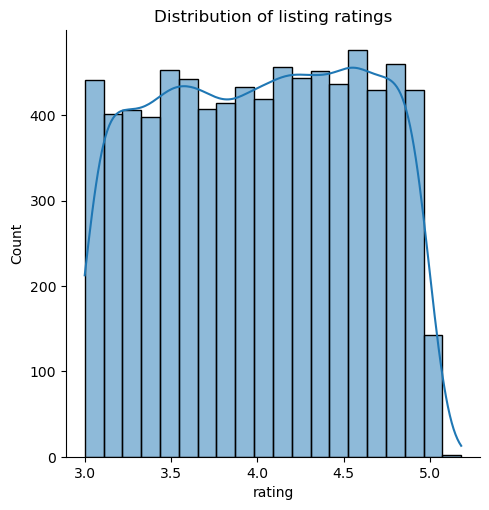

In [8]:
# Visualize the distribution of the rating column
sns.displot(airbnb['rating'], bins=20, kde=True)
plt.title('Distribution of listing ratings')
plt.show()

In [9]:
# Find number of unique values in room_type column
airbnb['room_type'].value_counts()

room_type
Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: count, dtype: int64

- **Problem 8**: There are trailing spaces and capitalization issues with `room_type`, we need to fix this problem.

In [10]:
# How many values of different room_types do we have?
print(len(airbnb['room_type'].unique()))

7


## **Our to do list:**

_Data type problems:_

- **Task 1**: Split `coordinates` into 2 columns and convert them to `float`
- **Task 2**: Remove `$` from `price` and convert it to `float`
- **Task 3**: Convert `listing_added` and `last_review` to `datetime`

<br>

_Text/categorical data problems:_

- **Task 4**: We need to collapse `room_type` into correct categories
- **Task 5**: Divide `neighbourhood_full` into 2 columns and making sure they are clean

<br>

_Data range problems:_

- **Task 6**: Make sure we set the correct maximum for `rating` column out of range values

<br>

_Dealing with missing data:_

- **Task 7**: Understand the type of missingness, and deal with the missing data in most of the remaining columns. 

<br>

_Is that all though?_

- We need to investigate if we duplicates in our data
- We need to make sure that data makes sense by applying some sanity checks on our DataFrame 

## **Q&A**

## **Cleaning data** 

### Data type problems

In [11]:
# Reminder of the DataFrame
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


##### **Task 1:** Replace `coordinates` with `latitude` and `longitude` columns

To perform this task, we will use the following methods:

- `.str.replace("","")` replaces one string in each row of a column with another
- `.str.split("")` takes in a string and lets you split a column into two based on that string
- `.astype()` lets you convert a column from one type to another

In [12]:
# Remove "(" and ")" from coordinates

airbnb["coordinates"] = airbnb["coordinates"].str.replace("(", " ").str.replace(")", " ")

# Print the header of the column
airbnb["coordinates"].head()

0     40.63222, -73.93398 
1     40.78761, -73.96862 
2      40.7007, -73.99517 
3     40.79169, -73.97498 
4     40.71884, -73.98354 
Name: coordinates, dtype: object

In [13]:
# Split column into two
airbnb[['latitude', 'longitude']] = airbnb['coordinates'].str.split(', ', expand=True)

In [14]:
# Assign correct columns to latitude and longitude columns in airbnb
airbnb['latitude'] = airbnb['latitude'].astype(float)
airbnb['longitude'] = airbnb['longitude'].astype(float)

# Print the header and confirm new column creation
print(airbnb[['latitude', 'longitude']].head())

   latitude  longitude
0  40.63222  -73.93398
1  40.78761  -73.96862
2  40.70070  -73.99517
3  40.79169  -73.97498
4  40.71884  -73.98354


In [15]:
# Print out dtypes again
print(airbnb[['latitude', 'longitude']].dtypes)

latitude     float64
longitude    float64
dtype: object


In [16]:
# Convert latitude and longitude to float
airbnb[['latitude', 'longitude']]=airbnb[['latitude', 'longitude']].astype('float')

# Print dtypes again
print(airbnb[['latitude', 'longitude']].dtypes)

latitude     float64
longitude    float64
dtype: object


In [17]:
# Drop coordinates column
airbnb.drop(columns="coordinates",inplace=True)
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


##### **Task 2:** Remove `$` from `price` and convert it to `float`

To perform this task, we will be using the following methods:

- `.str.strip()` which removes a specified string from each row in a column
- `.astype()`

In [18]:
# Calculate mean of price without conversion
airbnb["price"].mean()

TypeError: can only concatenate str (not "int") to str

In [19]:
# Remove $ from price before conversion to float
print(airbnb['price'])
airbnb['price'] = airbnb['price'].str.strip('$')
# Print header to make sure change was done
airbnb['price'].head()

0         45$
1        135$
2        150$
3         86$
4        160$
         ... 
10014    105$
10015    125$
10016    100$
10017    450$
10018     90$
Name: price, Length: 10019, dtype: object


0     45
1    135
2    150
3     86
4    160
Name: price, dtype: object

In [20]:
# Convert price to float
airbnb['price']=airbnb['price'].astype('float')
# Calculate mean of price after conversion
airbnb['price'].mean()

150.90512217564665

C:\Users\AMIRA\.conda\envs\DM_ENV\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


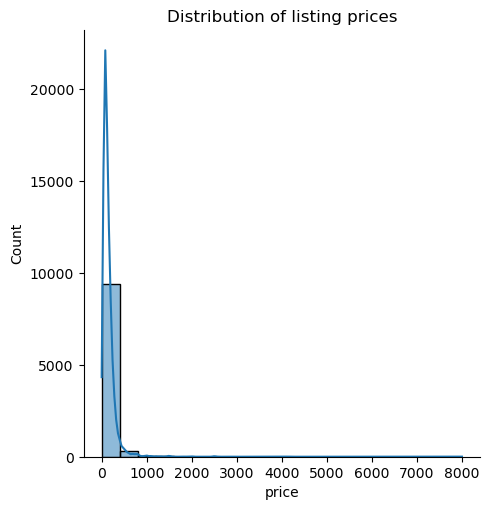

In [21]:
# Visualize distribution of prices
sns.displot(airbnb['price'], bins=20, kde=True)
plt.title('Distribution of listing prices')
plt.show()

##### **Task 3:** Convert `listing_added` and `last_review` columns to `datetime`

To perform this task, we will use the following functions:

- `pd.to_datetime(format = "")`
  - `format` takes in the desired date format `"%Y-%m-%d"`

In [22]:
# Print header of two columns
print(airbnb[['listing_added', 'last_review']].head())


  listing_added last_review
0    2018-06-08  2018-12-12
1    2018-12-25  2019-06-30
2    2018-08-15         NaN
3    2017-03-20  2017-09-23
4    2020-10-23  2019-06-12


In [23]:
# Convert both columns to datetime

airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'], format="%Y-%m-%d", errors='coerce')
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], format="%Y-%m-%d", errors='coerce')

In [24]:
# Print header and datatypes of both columns again
print(airbnb[['listing_added', 'last_review']].head())
print(airbnb[['listing_added', 'last_review']].dtypes)

  listing_added last_review
0    2018-06-08  2018-12-12
1    2018-12-25  2019-06-30
2    2018-08-15         NaT
3    2017-03-20  2017-09-23
4    2020-10-23  2019-06-12
listing_added    datetime64[ns]
last_review      datetime64[ns]
dtype: object


### Text and categorical data problems

##### **Task 4:** We need to collapse `room_type` into correct categories

To perform this task, we will be using the following methods:

- `.str.lower()` to lowercase all rows in a string column
- `.str.strip()` to remove all white spaces of each row in a string column
- `.replace()` to replace values in a column with another

In [25]:
# Print unique values of `room_type`
print(airbnb["room_type"].unique())

['Private room' 'Entire home/apt' 'Private' 'Shared room' 'PRIVATE ROOM'
 'home' '   Shared room      ']


In [26]:
# Deal with capitalized values
airbnb["room_type"]=airbnb["room_type"].str.lower()
print(airbnb["room_type"].unique())

['private room' 'entire home/apt' 'private' 'shared room' 'home'
 '   shared room      ']


In [27]:
# Deal with trailing spaces
airbnb["room_type"]=airbnb["room_type"].str.strip(" ")
print(airbnb["room_type"].unique())

['private room' 'entire home/apt' 'private' 'shared room' 'home']


In [28]:
# Replace values to 'Shared room', 'Entire place', 'Private room' and 'Hotel room' (if applicable).
replacements={
    'private':'Private room',
    'entire home/apt': 'Entire place',
    'shared room':'Shared room',
    'home':'Entire place'
}

# Replace values and collapse data
airbnb["room_type"]=airbnb["room_type"].replace(replacements)
print(airbnb["room_type"].unique())


['private room' 'Entire place' 'Private room' 'Shared room']


##### **Task 5:** Divide `neighbourhood_full` into 2 columns and making sure they are clean

In [29]:
# Print header of column
print(airbnb["neighbourhood_full"].head())

0           Brooklyn, Flatlands
1    Manhattan, Upper West Side
2    Brooklyn, Brooklyn Heights
3    Manhattan, Upper West Side
4    Manhattan, Lower East Side
Name: neighbourhood_full, dtype: object


In [30]:
# Split neighbourhood_full
result=airbnb['neighbourhood_full'].str.split(', ', expand=True)

In [31]:
# Create borough and neighbourhood columns
airbnb[['neighbourhood', 'borough']] = result

# Print header of columns
print(airbnb[['neighbourhood', 'borough']].head())

  neighbourhood           borough
0      Brooklyn         Flatlands
1     Manhattan   Upper West Side
2      Brooklyn  Brooklyn Heights
3     Manhattan   Upper West Side
4     Manhattan   Lower East Side


In [32]:
# Drop neighbourhood_full column
airbnb.drop(columns="neighbourhood_full",inplace=True)

In [33]:
# Print out unique values of borough and neighbourhood
print(airbnb['neighbourhood'].unique())
print(airbnb['borough'].unique())


['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']
['Flatlands' 'Upper West Side' 'Brooklyn Heights' 'Lower East Side'
 'Greenwich Village' 'Harlem' 'Sheepshead Bay' 'Theater District'
 'Bushwick' 'Laurelton' 'Mott Haven' 'Flushing' 'Crown Heights' 'Midtown'
 'Financial District' 'East Village' 'Park Slope' 'Washington Heights'
 'Williamsburg' 'Chelsea' 'Bedford-Stuyvesant' 'Gowanus' 'Upper East Side'
 'Ditmars Steinway' 'Cypress Hills' "Hell's Kitchen" 'Ridgewood'
 'Marble Hill' 'Kips Bay' 'Prospect Heights' 'East New York' 'Concord'
 'Stapleton' 'Astoria' 'East Harlem' 'Sunnyside' 'Gramercy'
 'Prospect-Lefferts Gardens' 'Sunset Park' 'Forest Hills'
 'Windsor Terrace' 'Clinton Hill' 'Murray Hill' 'Flatiron District'
 'Greenpoint' 'East Flatbush' 'Tribeca' 'Woodhaven' 'Fort Greene' 'Inwood'
 'Chinatown' 'Rockaway Beach' 'Woodside' 'Bayside' 'Bensonhurst' 'SoHo'
 'Red Hook' 'West Village' 'South Slope' 'Richmond Hill' 'Jamaica'
 'Boerum Hill' 'St. George' 'Clason Point' 'College 

In [34]:
# Strip white space from neighbourhood column
# airbnb['neighbourhood']=airbnb['neighbourhood'].str.strip("") => didn't work dunno why ! 
airbnb['neighbourhood'] = airbnb['neighbourhood'].str.replace(" ","")
# Print unique values again
print(airbnb['neighbourhood'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'StatenIsland']


##### **Task 6:** Make sure we set the correct maximum for `rating` column out of range values

C:\Users\AMIRA\.conda\envs\DM_ENV\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


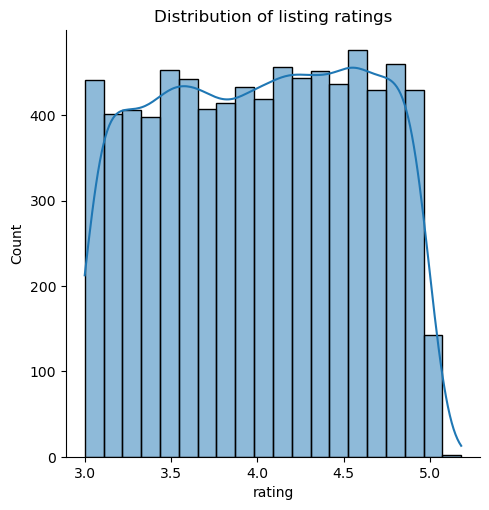

In [35]:
# Visualize the rating column again
sns.displot(airbnb['rating'], bins=20, kde=True)
plt.title('Distribution of listing ratings')
plt.show()

In [36]:
# Isolate rows of rating > 5.0
airbnb_outrange = airbnb[airbnb['rating']>5.0]

In [37]:
# Drop these rows and make sure we have effected changes
indices_to_drop = airbnb_outrange.index
airbnb.drop(indices_to_drop, inplace=True)

C:\Users\AMIRA\.conda\envs\DM_ENV\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


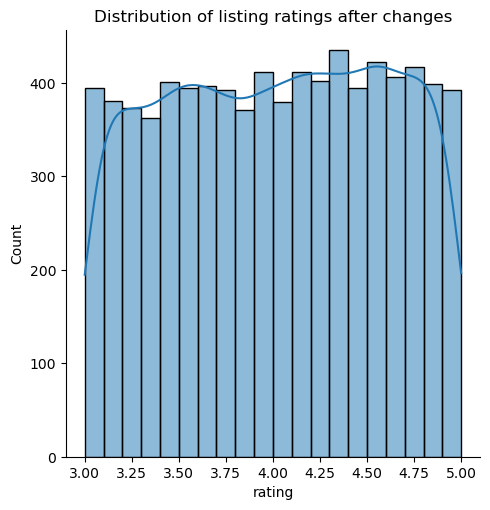

In [38]:
# Visualize the rating column again
sns.displot(airbnb['rating'], bins=20, kde=True)
plt.title('Distribution of listing ratings after changes')
plt.show()


In [39]:
# Get the maximum
print(airbnb['rating'].max())

4.999561104773598


## **Q&A**

### Dealing with missing data

**Treating the** `rating`, `number_of_stays`, `5_stars`, `reviews_per_month` **columns**

In [40]:
# Understand DataFrame with missing values in rating, number_of_stays, 5_stars, reviews_per_month
airbnb[airbnb['rating'].isna()].describe().T

,count,mean,min,25%,50%,75%,max,std
listing_id,2075.0,22742381.645783,63588.0,12329233.5,23451817.0,34003636.5,36487245.0,11237301.767625
host_id,2075.0,80224554.255422,14751.0,12243051.0,40401163.0,133349756.5,274103383.0,86631633.243136
price,2028.0,191.553748,0.0,70.0,120.0,205.25,5250.0,316.186639
number_of_reviews,2075.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
last_review,0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
reviews_per_month,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_365,2075.0,104.531566,0.0,0.0,7.0,211.0,365.0,138.266525
rating,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_stays,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5_stars,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the missing data in the DataFrame - we can see that `number_of_reviews` across all missing rows is 0. We can infer that these listings have never been visited - hence could be inferred they're inactive/have never been visited.

We can impute them as following:

- Set `NaN` for `reviews_per_month`, `number_of_stays`, `5_stars` to 0.
- Since a `rating` did not happen, let's keep the column as is - but create a new column named `rated` that takes in `1` if yes, `0` if no.
- We will also leave `last_review` as is.

**Hint:** You can use a dictionary like `{'reviews_per_month': 0, 'number_of_stays': 0, '5_stars': 0}` with the `fillna` function to fill missing values in specific columns.


In [41]:
# Impute missing data
columns_to_fill = {'reviews_per_month': 0, 'number_of_stays': 0, '5_stars': 0}
airbnb.fillna(columns_to_fill, inplace=True)
# we can even do the following 
# airbnb[['reviews_per_month', 'number_of_stays', '5_stars']] = airbnb[['reviews_per_month', 'number_of_stays', '5_stars']].replace(np.nan,0)

# Create is_rated column
airbnb['is_rated'] = airbnb['rating'].notna().astype(int)
print(airbnb[['rating','is_rated']])
# or we can do :
# airbnb['rated'] = airbnb['rating'].apply(lambda x: 1 if not pd.isna(x) else 0)

         rating  is_rated
0      4.100954         1
1      3.367600         1
2           NaN         0
3      4.763203         1
4      3.822591         1
...         ...       ...
10014  4.757555         1
10015  4.344704         1
10016  3.966214         1
10017  4.078581         1
10018  4.069096         1

[10016 rows x 2 columns]


In [42]:
# Investigate DataFrame with missing values in price
airbnb[airbnb['price'].isna()].describe().T

,count,mean,min,25%,50%,75%,max,std
listing_id,238.0,18056558.752101,80924.0,8282298.5,18636001.0,27537591.25,36388748.0,10651757.115195
host_id,238.0,62629650.436975,114590.0,6034050.5,28095243.5,100900556.75,266826469.0,75187848.044131
price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,238.0,22.445378,0.0,1.0,6.0,26.0,207.0,35.798003
last_review,191,2018-10-18 04:31:24.816753920,2015-08-11 00:00:00,2018-07-10 12:00:00,2019-05-20 00:00:00,2019-06-24 00:00:00,2019-07-08 00:00:00,NaN
reviews_per_month,238.0,1.117563,0.0,0.08,0.35,1.435,8.87,1.666262
availability_365,238.0,98.953782,0.0,0.0,23.0,192.0,365.0,125.872256
rating,191.0,4.078343,3.007359,3.646496,4.149203,4.538671,4.957646,0.568705
number_of_stays,238.0,26.934454,0.0,1.2,7.2,31.2,248.4,42.957603
5_stars,238.0,0.577721,0.0,0.613462,0.681884,0.746239,0.934979,0.297066


In [43]:
# Investigate DataFrame with missing values in price
airbnb[airbnb['price'].isna()].describe().T

,count,mean,min,25%,50%,75%,max,std
listing_id,238.0,18056558.752101,80924.0,8282298.5,18636001.0,27537591.25,36388748.0,10651757.115195
host_id,238.0,62629650.436975,114590.0,6034050.5,28095243.5,100900556.75,266826469.0,75187848.044131
price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,238.0,22.445378,0.0,1.0,6.0,26.0,207.0,35.798003
last_review,191,2018-10-18 04:31:24.816753920,2015-08-11 00:00:00,2018-07-10 12:00:00,2019-05-20 00:00:00,2019-06-24 00:00:00,2019-07-08 00:00:00,NaN
reviews_per_month,238.0,1.117563,0.0,0.08,0.35,1.435,8.87,1.666262
availability_365,238.0,98.953782,0.0,0.0,23.0,192.0,365.0,125.872256
rating,191.0,4.078343,3.007359,3.646496,4.149203,4.538671,4.957646,0.568705
number_of_stays,238.0,26.934454,0.0,1.2,7.2,31.2,248.4,42.957603
5_stars,238.0,0.577721,0.0,0.613462,0.681884,0.746239,0.934979,0.297066


In [5]:

import numpy as np

x = np.array([1,1,1,1])
y = np.array([2,2,2,2])

correlation = np.corrcoef(x, y)[0, 1]
print(correlation)


nan


C:\Users\AMIRA\.conda\envs\DM_ENV\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


From a common sense perspective, the most predictive factor for a room's price is the `room_type` column, so let's visualize how price varies by room type with `sns.boxplot()` which displays the following information:


<p align="center">
<img src="boxplot.png" alt = "DataCamp icon" width="80%">
</p>




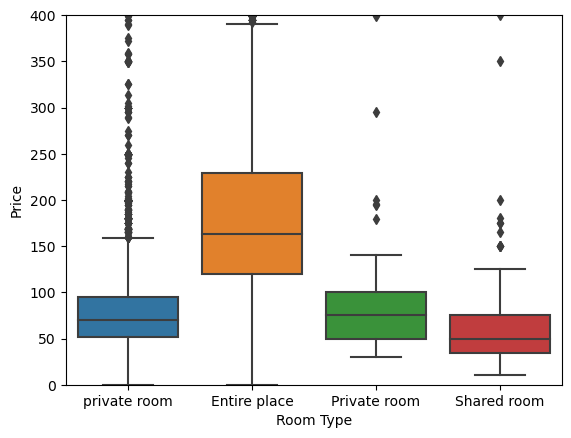

In [44]:
# Visualize relationship between price and room_type
sns.boxplot(x = 'room_type', y = 'price', data = airbnb)
plt.ylim(0, 400)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


In [45]:
# Get median price per room_type
median_price_per_room_type = airbnb.groupby('room_type')['price'].median()
print(median_price_per_room_type)

room_type
Entire place    163.0
Private room     75.0
Shared room      50.0
private room     70.0
Name: price, dtype: float64


In [46]:
# Impute price based on conditions




In [47]:
# Confirm price has been imputed


### What's still to be done?

Albeit we've done a significant amount of data cleaning tasks, there are still a couple of problems we have yet to diagnose. When cleaning data, we need to consider:

- Values that do not make any sense *(for example: are there values of `last_review` that older than `listing_added`? Are there listings in the future?*)
- Presence of duplicates values - and how to deal with them?

##### **Task 8:** Do we have consistent date data?

In [48]:
# # Doing some sanity checks on date data
# date_data = pd.DataFrame(airbnb.select_dtypes(include=['datetime64']),columns=['last_review','listing_added'])
# print(date_data)
# # check missing values
# missing_dates = date_data.isnull().sum()
# print(f"Number of missing dates: {missing_dates}")

# # check data type 
# date_column_dtype = date_data.dtypes
# print(f"Data type of date column: {date_column_dtype}")

# min_date_1= airbnb["last_review"].min()
# min_date_2=airbnb["listing_added"].min()
# max_date_1= airbnb["last_review"].max()
# max_date_2=airbnb["listing_added"].max()
# print(f"Minimum date: {min_date_1}")
# print(f"Minimum date: {min_date_2}")
# print(f"Maximum date: {max_date_1}")
# print(f"Maximum date: {max_date_2}")

# # check dupplicates 
# duplicates = airbnb[airbnb.duplicated(subset=['last_review', 'listing_added'])]
# print(f"Number of duplicate rows based on last_review and listing_added: {len(duplicates)}")



In [49]:
airbnb[airbnb['last_review'].isnull()].describe()

,listing_id,host_id,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,is_rated
count,2.075000e+03,2.075000e+03,2028.000000,2075.0,0,2075.0,2075.000000,0.0,2075.0,2075.0,2075,2075.000000,2075.000000,2075.0
mean,2.274238e+07,8.022455e+07,191.553748,0.0,NaT,0.0,104.531566,NaN,0.0,0.0,2018-06-08 17:01:31.951807232,40.732074,-73.956771,0.0
min,6.358800e+04,1.475100e+04,0.000000,0.0,NaT,0.0,0.000000,NaN,0.0,0.0,2018-02-03 00:00:00,40.527000,-74.209410,0.0
25%,1.232923e+07,1.224305e+07,70.000000,0.0,NaT,0.0,0.000000,NaN,0.0,0.0,2018-04-05 00:00:00,40.697845,-73.985185,0.0
50%,2.345182e+07,4.040116e+07,120.000000,0.0,NaT,0.0,7.000000,NaN,0.0,0.0,2018-06-05 00:00:00,40.727790,-73.960940,0.0
75%,3.400364e+07,1.333498e+08,205.250000,0.0,NaT,0.0,211.000000,NaN,0.0,0.0,2018-08-13 00:00:00,40.763480,-73.939540,0.0
max,3.648724e+07,2.741034e+08,5250.000000,0.0,NaT,0.0,365.000000,NaN,0.0,0.0,2018-10-17 00:00:00,40.911690,-73.727310,0.0
std,1.123730e+07,8.663163e+07,316.186639,0.0,NaN,0.0,138.266525,NaN,0.0,0.0,NaN,0.051168,0.041065,0.0


In [50]:
# Are there reviews in the future?
airbnb.sort_values('last_review', ascending=False)

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,neighbourhood,borough,is_rated
5413,34399221,Spacious 1 BDRM w/ Backyard of DREAMS in Manha...,6279234,Marissa,Entire place,148.0,1,2019-07-08,1.00,8,3.567071,1.2,0.642857,2019-01-02,40.80948,-73.95514,Manhattan,Harlem,1
8174,1843108,HappyCozy GuestSuite w/ Great Energy close to JFK,2021121,Megan,Entire place,125.0,319,2019-07-08,8.52,357,4.443130,382.8,0.621931,2019-01-02,40.67840,-73.89362,Brooklyn,Cypress Hills,1
808,33810599,Furnished modern studio luxury elevator building,28175069,Leanne,Entire place,160.0,3,2019-07-08,1.38,0,3.974132,3.6,0.620053,2019-01-02,40.71138,-74.00834,Manhattan,Financial District,1
6972,34416461,Amazing room at Brooklyn close to subway station,251311623,Vitória,private room,58.0,3,2019-07-08,1.48,167,4.804022,3.6,0.600501,2019-01-02,40.67853,-73.91262,Brooklyn,Bedford-Stuyvesant,1
4149,22340384,Great Place! Great Space! Welcome 2 My BK Place!,18049970,Lou,Entire place,175.0,56,2019-07-08,3.00,288,4.821341,67.2,0.871003,2019-01-02,40.65948,-73.90084,Brooklyn,Brownsville,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,36347051,Beautiful Large Bedroom in the Heart of Harlem,273101668,Betty,Private room,60.0,0,NaT,0.00,72,NaN,0.0,0.000000,2018-04-18,40.83225,-73.94496,Manhattan,Harlem,0
9992,35805262,Discounted! Quiet 1 BR next to Times Square,10745276,Kortney William,Entire place,225.0,0,NaT,0.00,270,NaN,0.0,0.000000,2018-08-02,40.75993,-73.99074,Manhattan,Hell's Kitchen,0
9995,28390924,Comfortable rooms 15 minutes to Manhattan,49568280,Hakan,private room,95.0,0,NaT,0.00,177,NaN,0.0,0.000000,2018-06-09,40.77699,-73.91354,Queens,Ditmars Steinway,0
10004,9486332,Brand New Upper East Side!,49167534,Andrea,Entire place,175.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-02-26,40.77281,-73.95822,Manhattan,Upper East Side,0


In [51]:
# Are there listings in the future?
airbnb.sort_values('listing_added', ascending=False)

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,neighbourhood,borough,is_rated
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side,1
521,25317793,Awesome Cozy Room in The Heart of Sunnyside!,136406167,Kara,private room,65.0,22,2019-06-11,1.63,131,4.442485,26.4,0.722388,2020-10-22,40.74090,-73.92696,Queens,Sunnyside,1
511,33619855,Modern & Spacious in trendy Crown Heights,253354074,Yehudis,Entire place,150.0,6,2019-05-27,2.50,148,3.462432,7.2,0.610929,2020-10-07,40.66387,-73.93840,Brooklyn,Crown Heights,1
124,28659894,Private bedroom in prime Bushwick! Near Trains!!!,216235179,Nina,private room,55.0,4,2019-04-12,0.58,358,4.916252,4.8,0.703117,2020-08-23,40.69988,-73.92072,Brooklyn,Bushwick,1
50,20783900,Marvelous Manhattan Marble Hill Private Suites,148960265,Randy,private room,93.0,7,2018-10-06,0.32,0,4.868036,8.4,0.609263,2020-02-17,40.87618,-73.91266,Manhattan,Marble Hill,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,755684,Cozy Soho Studio Loft Apt Bleecker,3977494,Sandra,Entire place,187.0,1,2013-01-04,0.01,0,3.599051,1.2,0.643790,2012-07-01,40.72714,-73.99581,Manhattan,Greenwich Village,1
148,505231,"Enjoy a 1 Bedroom to share, NYC",2490915,Catherine,private room,80.0,1,2012-06-22,0.01,0,4.675936,1.2,0.626560,2011-12-18,40.77799,-73.95223,Manhattan,Upper East Side,1
9258,344019,Best West Village/Meatpacking Space,1746209,R.,private room,195.0,7,2012-06-07,0.08,129,3.670905,8.4,0.747223,2011-12-03,40.73104,-74.00879,Manhattan,West Village,1
1513,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,private room,249.0,2,2011-05-12,0.02,60,4.168383,2.4,0.662084,2010-11-06,40.73842,-73.95312,Brooklyn,Greenpoint,1


In [52]:
# Drop these rows since they are only 4 rows


In [53]:
# Are there any listings with listing_added > last_review
listings_with_listing_after_last_review = airbnb[airbnb['listing_added'] > airbnb['last_review']]

print(listings_with_listing_after_last_review)

     listing_id                                               name    host_id  \
4      22986519              Bedroom on the lively Lower East Side  154262349   
50     20783900     Marvelous Manhattan Marble Hill Private Suites  148960265   
60      1908852                Oversized Studio By Columbus Circle     684629   
124    28659894  Private bedroom in prime Bushwick! Near Trains!!!  216235179   
511    33619855          Modern & Spacious in trendy Crown Heights  253354074   
521    25317793       Awesome Cozy Room in The Heart of Sunnyside!  136406167   

    host_name     room_type  price  number_of_reviews last_review  \
4      Brooke  private room  160.0                 23  2019-06-12   
50      Randy  private room   93.0                  7  2018-10-06   
60      Alana  Entire place  189.0                  7  2016-05-06   
124      Nina  private room   55.0                  4  2019-04-12   
511   Yehudis  Entire place  150.0                  6  2019-05-27   
521      Kara  pri

In [54]:
# Drop these rows since they are only 2 rows
to_drop= listings_with_listing_after_last_review.index

# Use the drop method to remove these rows from the DataFrame
airbnb.drop(to_drop, inplace=True)

##### **Task 9:** Let's deal with duplicate data


There are two notable types of duplicate data:

- Identical duplicate data across all columns
- Identical duplicate data cross most or some columns

To diagnose, and deal with duplicate data, we will be using the following methods and functions:

- `.duplicated(subset = , keep = )`
  - `subset` lets us pick one or more columns with duplicate values.
  - `keep` returns lets us return all instances of duplicate values.
- `.drop_duplicates(subset = , keep = )`
  

In [55]:
# Print the header of the DataFrame again
airbnb.head()

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,neighbourhood,borough,is_rated
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands,1
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side,1
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire place,150.0,0,NaT,0.00,65,NaN,0.0,0.000000,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights,0
3,6425850,"Spacious, charming studio",32715865,Yelena,Entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side,1
5,271954,Beautiful brownstone apartment,1423798,Aj,Entire place,150.0,203,2019-06-20,2.22,300,4.478396,243.6,0.743500,2018-12-15,40.73388,-73.99452,Manhattan,Greenwich Village,1


In [56]:
# Find duplicates
airbnb[airbnb.duplicated()]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,neighbourhood,borough,is_rated
3007,17861841,THE CREATIVE COZY ROOM,47591528,Janessa,private room,99.0,13,2019-05-23,0.52,82,4.806590,15.6,0.937422,2018-11-17,40.59211,-73.94127,Brooklyn,Sheepshead Bay,1
3340,35646737,"Private Cabins @ Chelsea, Manhattan",117365574,Maria,private room,85.0,1,2019-06-22,1.00,261,4.951714,1.2,0.671388,2018-12-17,40.74946,-73.99627,Manhattan,Chelsea,1
5077,33831116,Sonder | Stock Exchange | Collected 1BR + Laundry,219517861,Sonder (NYC),Entire place,229.0,5,2019-06-15,1.92,350,4.026379,6.0,0.601737,2018-12-10,40.70621,-74.01199,Manhattan,Financial District,1
5397,16518377,East Village 1BR Apt with all the amenities,3012457,Cody,Entire place,200.0,3,2018-07-10,0.16,0,4.676670,3.6,0.694443,2018-01-04,40.72350,-73.97963,Manhattan,East Village,1
6068,22014840,Sunny Bedroom Only 1 Metro Stop to Manhattan,32093643,Scarlett,private room,70.0,2,2018-01-07,0.11,0,4.024336,2.4,0.719426,2017-07-04,40.76211,-73.94887,Manhattan,Roosevelt Island,1
6085,33346762,2BR Apartment in Brownstone Brooklyn!,50321289,Avery,Entire place,140.0,4,2019-06-14,1.58,4,4.013393,4.8,0.719591,2018-12-09,40.68200,-73.95681,Brooklyn,Bedford-Stuyvesant,1
6132,23990868,1 Bedroom in Luxury Building,4447548,Grace,Entire place,88.0,8,2019-06-16,0.56,18,4.164548,9.6,0.640106,2018-12-11,40.69336,-73.94453,Brooklyn,Bedford-Stuyvesant,1
6313,32610834,Manhattan by the water!,12132369,Omar,Entire place,150.0,0,NaT,0.00,9,NaN,0.0,0.000000,2018-06-28,40.73767,-73.97384,Manhattan,Kips Bay,0
6438,19477677,Huge sunny room next to subway!,25038748,Justin,private room,70.0,11,2019-05-11,0.45,0,3.074890,13.2,0.631619,2018-11-05,40.82119,-73.95583,Manhattan,Harlem,1
6562,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Entire place,199.0,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27,40.73652,-73.95236,Brooklyn,Greenpoint,1


In [57]:
# Find duplicates


In [58]:
# Remove identical duplicates
airbnb = airbnb.drop_duplicates()


In [59]:
# Find non-identical duplicates
airbnb[airbnb.duplicated(subset=['listing_id', 'name'], keep=False)]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,neighbourhood,borough,is_rated
77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire place,289.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
555,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire place,154.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1
1481,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,Entire place,180.0,10,2018-12-31,0.30,0,3.969729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village,1
2255,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire place,280.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
2871,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,private room,70.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
3430,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,Entire place,180.0,10,2018-12-31,0.30,0,3.869729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village,1
4187,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,private room,73.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
5761,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,Entire place,250.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-05-24,40.71257,-73.96149,Brooklyn,Williamsburg,0
7155,35801208,Comfy 2 bedroom Close To Manhattan,256911412,Taylor,Entire place,101.0,0,NaT,0.00,27,NaN,0.0,0.000000,2018-10-17,40.70469,-73.93690,Brooklyn,Williamsburg,0
7316,31470004,Private bedroom/Bathroom in a 2 bedroom apartment,71241932,Max,private room,2500.0,0,NaT,0.00,90,NaN,0.0,0.000000,2018-04-09,40.72544,-73.97818,Manhattan,East Village,0


In [60]:
# Show all duplicates
airbnb[airbnb.duplicated(keep=False)]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,neighbourhood,borough,is_rated


To treat identical duplicates across some columns, we will chain the `.groupby()` and `.agg()` methods where we group by the column used to find duplicates (`listing_id`) and aggregate across statistical measures for `price`, `rating` and `list_added`. The `.agg()` method takes in a dictionary with each column's aggregation method - we will use the following aggregations:

- `mean` for `price` and `rating` columns
- `max` for `listing_added` column
- `first` for all remaining column

*A note on dictionary comprehensions:*

Dictionaries are useful data structures in Python with the following format
`my_dictionary = {key: value}` where a `key` is mapped to a `value` and whose `value` can be returned with `my_dictionary[key]` - dictionary comprehensions allow us to programmatically create dicitonaries using the structure:

```
{x: x*2 for x in [1,2,3,4,5]} 
{1:2, 2:4, 3:6, 4:8, 5:10}
```

In [61]:
# Get column names from airbnb
airbnb.columns


Index(['listing_id', 'name', 'host_id', 'host_name', 'room_type', 'price',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'availability_365', 'rating', 'number_of_stays', '5_stars',
       'listing_added', 'latitude', 'longitude', 'neighbourhood', 'borough',
       'is_rated'],
      dtype='object')

In [62]:
# Create dictionary comprehension with 'first' as value for all columns not being aggregated


aggregated_columns = ['price', 'rating', 'listing_added']

aggregation_dict = {
    col: 'first' if col not in aggregated_columns else ('max' if col == 'listing_added' else 'mean')
    for col in airbnb.columns if col != 'listing_id'  # Exclude 'listing_id'
}


In [63]:
# Remove non-identical duplicates
airbnb = airbnb.groupby('listing_id').agg(aggregation_dict).reset_index()

In [64]:
# Make sure no duplication happened
airbnb[airbnb.duplicated(subset=['listing_id', 'name'], keep=False)]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,neighbourhood,borough,is_rated


In [65]:
# Print header of DataFrame
airbnb.head()

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,neighbourhood,borough,is_rated
0,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Entire place,89.0,270,2019-07-05,4.64,194,3.273935,324.0,0.757366,2018-12-30,40.68514,-73.95976,Brooklyn,Clinton Hill,1
1,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Entire place,140.0,148,2019-06-29,1.20,46,3.495760,177.6,0.789743,2018-12-24,40.70837,-73.95352,Brooklyn,Williamsburg,1
2,7322,Chelsea Perfect,18946,Doti,private room,140.0,260,2019-07-01,2.12,12,4.389051,312.0,0.669873,2018-12-26,40.74192,-73.99501,Manhattan,Chelsea,1
3,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Entire place,99.0,53,2019-06-22,4.44,21,3.305382,63.6,0.640251,2018-12-17,40.67592,-73.94694,Brooklyn,Crown Heights,1
4,12303,1bdr w private bath. in lofty apt,47618,Yolande,private room,120.0,25,2018-09-30,0.23,311,4.568745,30.0,0.918593,2018-03-27,40.69673,-73.97584,Brooklyn,Fort Greene,1


## **Q&A**

### Take home question

Try to answer the following questions about the dataset:

- What is the average price of listings by borough? Visualize your results with a bar plot!
- What is the average availability in days of listings by borough? Visualize your results with a bar plot!
- What is the median price per room type in each borough? Visualize your results with a bar plot!
- Visualize the number of listings over time.

**Functions that should/could be used:**
- `.groupby()` and `.agg(})`
- `sns.barplot(x = , y = , hue = , data = )`
- `sns.lineplot(x = , y = , data = )`
- `.dt.strftime()` for extracting specific dates from a `datetime` column


## qst1: What is the average price of listings by borough? Visualize your results with a bar plot!

In [69]:
average_price = airbnb.groupby('borough')["price"].mean()
print(average_price )

borough
Allerton           107.666667
Arrochar           132.600000
Arverne            174.857143
Astoria            115.913514
Bath Beach          69.000000
                      ...    
Williamsbridge      92.000000
Williamsburg       142.901210
Windsor Terrace    130.760000
Woodhaven           69.083333
Woodside            77.814815
Name: price, Length: 198, dtype: float64


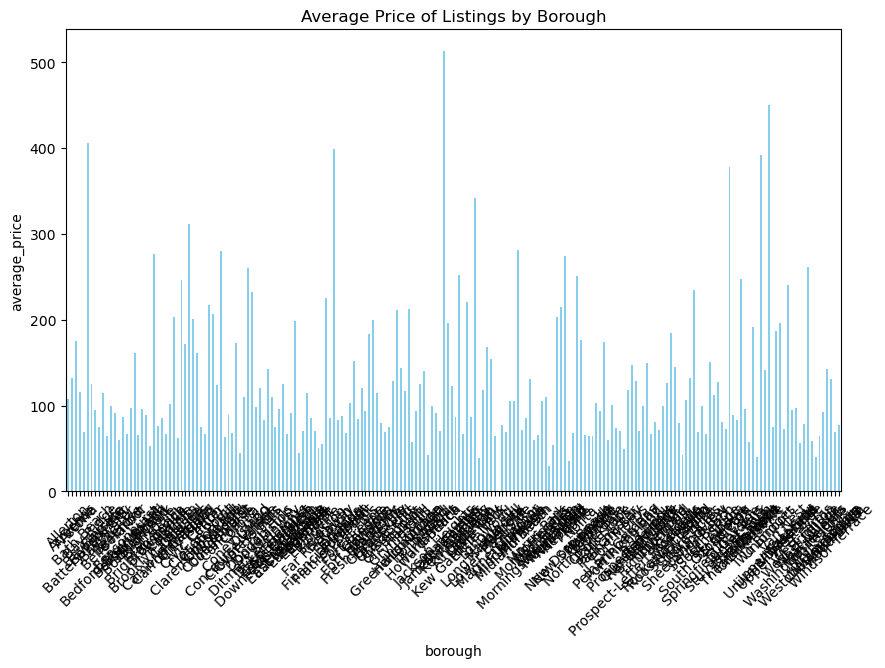

In [72]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6))
average_price.plot(kind='bar', color='skyblue')
plt.title('Average Price of Listings by Borough')
plt.xlabel('borough')
plt.ylabel('average_price')
plt.xticks(rotation=45)
plt.show()

## qst2: What is the average availability in days of listings by borough? Visualize your results with a bar plot!

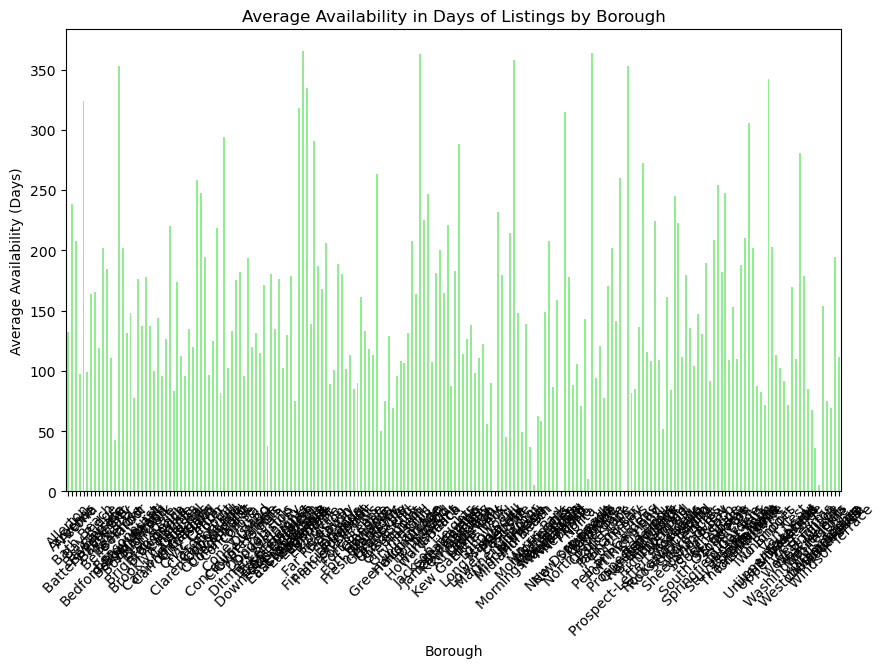

In [73]:
# Calculate the average availability in days of listings by borough
average_availability_by_borough = airbnb.groupby('borough')['availability_365'].mean()

# Visualize with a bar plot
plt.figure(figsize=(10, 6))
average_availability_by_borough.plot(kind='bar', color='lightgreen')
plt.title('Average Availability in Days of Listings by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Availability (Days)')
plt.xticks(rotation=45)
plt.show()

### Question 3: What is the median price per room type in each borough?


<Figure size 1200x600 with 0 Axes>

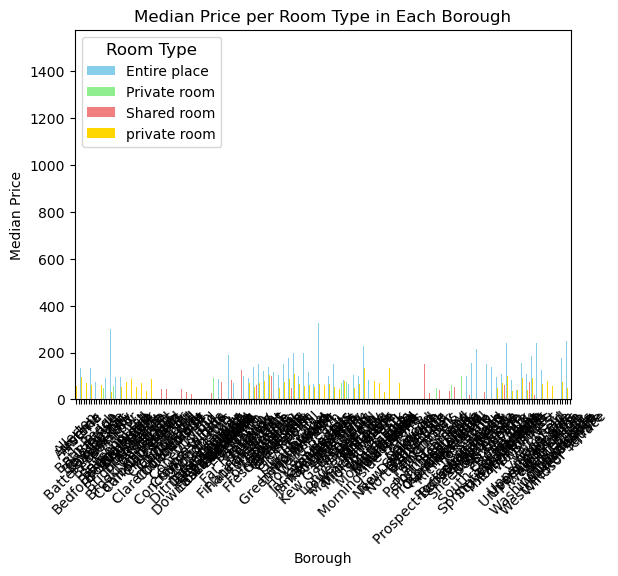

In [75]:
# Calculate the median price per room type in each borough
median_price_per_room_type = airbnb.groupby(['borough', 'room_type'])['price'].median().unstack()

# Visualize with a bar plot
plt.figure(figsize=(12, 6))
median_price_per_room_type.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Median Price per Room Type in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.legend(title='Room Type', title_fontsize='12')
plt.show()

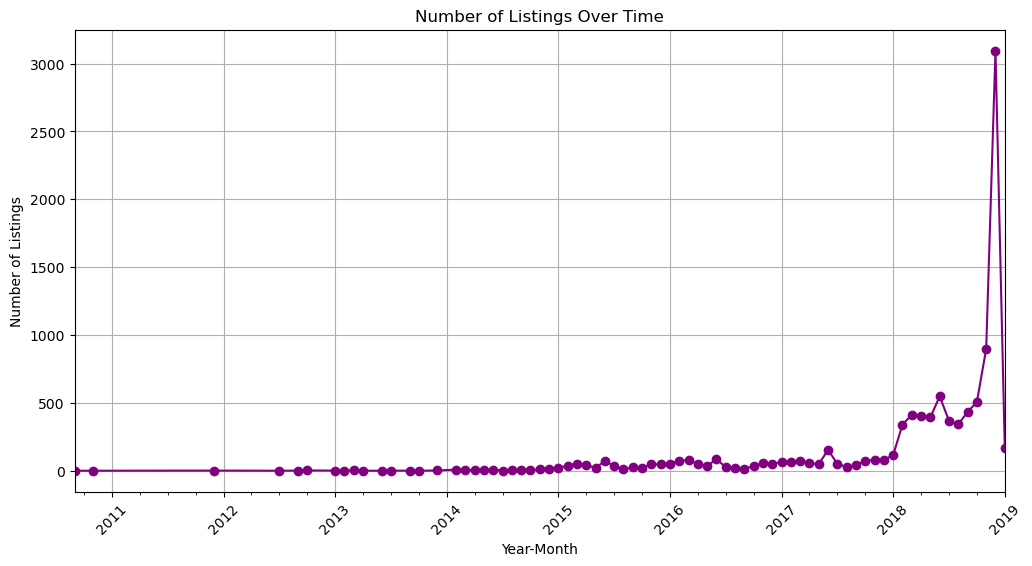

In [76]:
# Group by month and count the number of listings
listings_over_time = airbnb.groupby(airbnb['listing_added'].dt.to_period('M')).size()

# Visualize with a line plot
plt.figure(figsize=(12, 6))
listings_over_time.plot(kind='line', marker='o', color='purple')
plt.title('Number of Listings Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid()
plt.show()